## Background on the the task and data

* The task and data come from a Kaggle competition called [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/data), a beginner's competition section.
* The goal of the task is to predict whether a passanger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.
* The dataset has 3 files (train, test and sample of submission.csv)

Here is the data field descriptions:
* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    * PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    * HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    * CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    * Destination - The planet the passenger will be debarking to.
    * Age - The age of the passenger.
    * VIP - Whether the passenger has paid for special VIP service during the voyage.
    * RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    * Name - The first and last names of the passenger.
    * Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* sample_submission.csv - A submission file in the correct format.
    * PassengerId - Id for each passenger in the test set.
    * Transported - The target. For each passenger, predict either True or False.
    
This is an interesting beginner's task for developing skills, as it includes working with Pandas, Data Vizualization, Machine Learning and Deep Learning, as well as Fearture engineering. 

Kaggle has a short courses for each of the skills needed for the task. Here are the links:
* [Pandas](https://www.kaggle.com/learn/pandas) on using Python's most popular library for manipulating tabular data
* [Data Visualization](https://www.kaggle.com/learn/data-visualization) for discovering relationships in the dataset
* [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) on essential competition skills like categorical encoding and cross-validation
* [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) to discover neural networks
* [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) on how to improve performance by creating more informative inputs


### Goal

The goal of predicting whether each passenger was transported to another dimension or not.

#### Our target
Looking at the [leadership board](https://www.kaggle.com/competitions/spaceship-titanic/leaderboard) seems that a reasonable prediction would be in range of [0.80,0.83].

Given the rules of Kaggle and a given number of entry teams at the moment (2709 on 18.04.2024), we need to be in top 10% (or 270th or above) in order to get at least a Bronze medal for the task. This means that the prediction score needs to be **at least 0.81** or above.

## Strategy

Given the data, we will design our approach to the analysis in following steps:

1. **Data Cleaning**: Check for missing values, inconsistencies, or outliers in the dataset.
2. **Exploratory Data Analysis (EDA)**: Explore relationships between variables, identify patterns, and visualize distributions.
3. **Feature Engineering**: Create new features from existing ones that might improve predictive performance.
4. **Model Training**: Train machine learning models using the provided features to predict the 'Transported' column.
5. **Model Evaluation**: Evaluate the performance of the trained models using appropriate metrics like accuracy, precision, recall, or area under the ROC curve.

*Let's dive into the task!*

### Packages

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Data cleaning

In [2]:
# Getting the current working directory
os.getcwd()

'c:\\Users\\uig49683\\OneDrive - Continental AG\\Documents\\Python\\kaggle\\Spaceship Titanic'

In [3]:
# Setting the current working directory
os.chdir('C:\\Users\\uig49683\\OneDrive - Continental AG\\Documents\\Python\\kaggle\\Spaceship Titanic')

In [4]:
# Loading the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
train.shape

(8693, 14)

In [6]:
test.shape

(4277, 13)

In [7]:
# Let's check the data
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are 7 categorical, 1 binary and 6 numerical columns. The binary column (Transported) is the target.

In [9]:
# Let's check the numerical columns
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


There are possible outliers (e.i. age cannot be 0, and some big values in the other columns, as well). Let's visualize it.

#### Check for Inconsistencies or Outliers: 
We can visually inspect the distributions of numerical variables using histograms or box plots to identify potential outliers. For categorical variables, we will check for unusual or unexpected values.


c:\Users\uig49683\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\uig49683\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\uig49683\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\uig49683\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

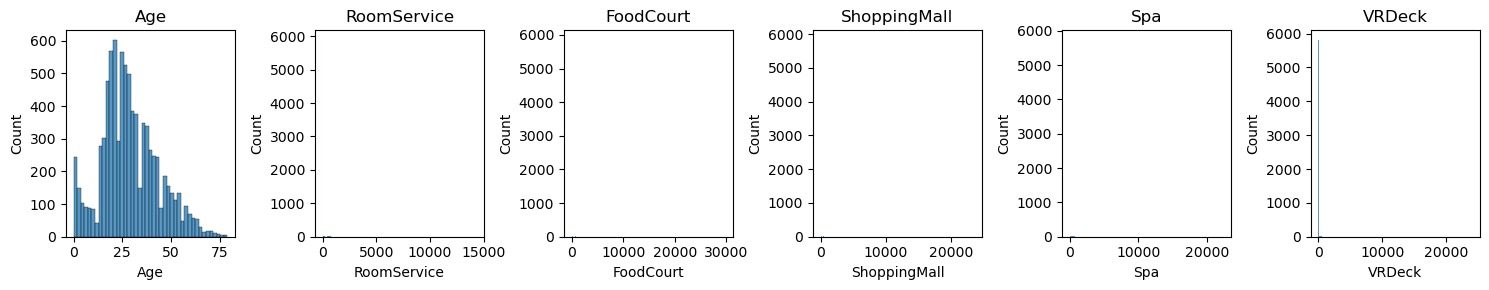

In [10]:
# Define the columns for visualization
columns_to_visualize = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Set up the matplotlib figure
plt.figure(figsize=(15, 3))

# Create subplots
for i, column in enumerate(columns_to_visualize):
    plt.subplot(1, len(columns_to_visualize), i+1)
    sns.histplot(train[column].dropna(), kde=False)
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### Handle Inconsistencies or Outliers
Depending on the findings from your exploration, we will either remove outliers, transform variables, or apply other data preprocessing techniques.

In [31]:
# Check for missing values
missing_values = train.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


#### Handle Missing Values:
We have two options, dropping the rows containing missing values or filling the value and all depends on the nature of the missing values and the context of the data.
* For example, we can drop rows with missing values using dropna()
* fill missing values with a specific value using fillna(). most commonly we can use mean(), median() or mode()[0]
* or use more sophisticated imputation techniques that leverage information from the rest of the dataset. These technique are:
    * Predictive Imputation: Use machine learning algorithms to predict missing values based on other variables in the dataset. This approach can be more accurate than simple imputation methods, especially when there are complex relationships between variables.
    * K-Nearest Neighbors (KNN) Imputation: Use the values of the nearest neighbors to impute missing values. This technique considers the similarity between data points to estimate missing values.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a copy of the dataframe to avoid modifying the original data
imputation_data = train.copy()

# Select features for imputation
impute_features = ['Pclass', 'SibSp', 'Parch', 'Fare']

# Split data into known and unknown values
known_values = imputation_data[imputation_data['Age'].notnull()]
unknown_values = imputation_data[imputation_data['Age'].isnull()]

# Train a Random Forest regressor to predict missing Age values
rf_imputer = RandomForestRegressor()
rf_imputer.fit(known_values[impute_features], known_values['Age'])

# Predict missing Age values
predicted_age = rf_imputer.predict(unknown_values[impute_features])

# Fill missing Age values with predictions
imputation_data.loc[imputation_data['Age'].isnull(), 'Age'] = predicted_age


In [ ]:
from sklearn.impute import KNNImputer

# Select features for KNN imputation
impute_features = ['Pclass', 'SibSp', 'Parch', 'Fare']

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputed_data = knn_imputer.fit_transform(train[impute_features])

# Convert the imputed data array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=impute_features)

# Update the original DataFrame with imputed values
train[impute_features] = imputed_df


## 2. EDA